# Micro Credit Project- Sudha Udayakumar

# Introduction

## Problem Statement Given

## More Details on Columns

# Choose Right Tool

## Importing and Installing the Packages

In [1]:
import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', None)       # To display all the data in each column
pd.set_option('display.precision', 3)               # To display values only upto three decimal places.
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()
pd.options.display.float_format = '{:.2f}'.format
import numpy as np
import seaborn as sns
sns.set(style='whitegrid', font_scale = 1.3, color_codes=True)

import matplotlib.pyplot as plt
%matplotlib inline


import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

## Handling Warnings

In [2]:
warnings.filterwarnings('ignore') # ignore warnings.
%config IPCompleter.greedy = True # autocomplete feature.
pd.options.display.max_rows = None # set maximum rows that can be displayed in notebook.
pd.options.display.max_columns = None # set maximum columns that can be displayed in notebook.
pd.options.display.precision = 2 # set the precision of floating point numbers.

# Loading Dataset

In [3]:
df=pd.read_csv('Micro_credit_project.csv')
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.00,3055.05,3065.15,220.13,260.13,2.00,0.00,1539,2,21.00,3078.00,1539.00,7.50,2,21,3078,1539.00,7.50,0.00,0.00,0,0,2,12,6.00,0.00,2.00,12,6,0.00,29.00,29.00,UPW,2016-07-20
1,2,1,76462I70374,712.00,12122.00,12124.75,3691.26,3691.26,20.00,0.00,5787,1,0.00,5787.00,5787.00,61.04,1,0,5787,5787.00,61.04,0.00,0.00,0,0,1,12,12.00,0.00,1.00,12,12,0.00,0.00,0.00,UPW,2016-08-10
2,3,1,17943I70372,535.00,1398.00,1398.00,900.13,900.13,3.00,0.00,1539,1,0.00,1539.00,1539.00,66.32,1,0,1539,1539.00,66.32,0.00,0.00,0,0,1,6,6.00,0.00,1.00,6,6,0.00,0.00,0.00,UPW,2016-08-19
3,4,1,55773I70781,241.00,21.23,21.23,159.42,159.42,41.00,0.00,947,0,0.00,0.00,0.00,0.00,1,0,947,947.00,2.50,0.00,0.00,0,0,2,12,6.00,0.00,2.00,12,6,0.00,0.00,0.00,UPW,2016-06-06
4,5,1,03813I82730,947.00,150.62,150.62,1098.90,1098.90,4.00,0.00,2309,7,2.00,20029.00,2309.00,29.00,8,2,23496,2888.00,35.00,0.00,0.00,0,0,7,42,6.00,0.00,7.00,42,6,0.00,2.33,2.33,UPW,2016-06-22


# Pre Processing the Data

In [4]:
df['label'].value_counts()

1    183431
0     26162
Name: label, dtype: int64


<span style='background:yellow'>Observation: This is an imbalanced Dataset, as "0" has only around 12% of data.  </span>

In [5]:
df.nunique()

Unnamed: 0              209593
label                        2
msisdn                  186243
aon                       4507
daily_decr30            147026
daily_decr90            158670
rental30                132148
rental90                141033
last_rech_date_ma         1186
last_rech_date_da         1174
last_rech_amt_ma            70
cnt_ma_rech30               71
fr_ma_rech30              1083
sumamnt_ma_rech30        15141
medianamnt_ma_rech30       510
medianmarechprebal30     30428
cnt_ma_rech90              110
fr_ma_rech90                89
sumamnt_ma_rech90        31771
medianamnt_ma_rech90       608
medianmarechprebal90     29785
cnt_da_rech30             1066
fr_da_rech30              1072
cnt_da_rech90               27
fr_da_rech90                46
cnt_loans30                 40
amnt_loans30                48
maxamnt_loans30           1050
medianamnt_loans30           6
cnt_loans90               1110
amnt_loans90                69
maxamnt_loans90              3
medianam

<span style='background:yellow'>Observation: we can see that Label column has only 2 values, which is our target column. Pcircle has only one value, and doesnt add value, so we can drop it. Also Unamed 0 doesnt add value, so we can drop it. msisdn is like the mobile number, so we can drop that as well" </span>

In [6]:
df.shape

(209593, 37)



<span style='background:yellow'>Observation:Number of rows to columns looks fine. We have 37 columns and anything less than 10x  or 20x rows would have made
the data tough to analyse.   </span>

In [7]:
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64



<span style='background:yellow'>Observation: There are no missing values, though already given in the case notes, its a good practice to double check it </span>

In [8]:
df.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

<span style='background:yellow'>Observation: pdate is object type, if we are going to use in our data we need to convert to dateseries  </span>

In [9]:
df.describe()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00
mean,104797.00,0.88,8112.34,5381.40,6082.52,2692.58,3483.41,3755.85,3712.20,2064.45,3.98,3737.36,7704.50,1812.82,3851.93,6.32,7.72,12396.22,1864.60,92.03,262.58,3749.49,0.04,0.05,2.76,17.95,274.66,0.05,18.52,23.65,6.70,0.05,3.40,4.32
std,60504.43,0.33,75696.08,9220.62,10918.81,4308.59,5770.46,53905.89,53374.83,2370.79,4.26,53643.63,10139.62,2070.86,54006.37,7.19,12.59,16857.79,2081.68,369.22,4183.90,53885.41,0.40,0.95,2.55,17.38,4245.26,0.22,224.80,26.47,2.10,0.20,8.81,10.31
min,1.00,0.00,-48.00,-93.01,-93.01,-23737.14,-24720.58,-29.00,-29.00,0.00,0.00,0.00,0.00,0.00,-200.00,0.00,0.00,0.00,0.00,-200.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,52399.00,1.00,246.00,42.44,42.69,280.42,300.26,1.00,0.00,770.00,1.00,0.00,1540.00,770.00,11.00,2.00,0.00,2317.00,773.00,14.60,0.00,0.00,0.00,0.00,1.00,6.00,6.00,0.00,1.00,6.00,6.00,0.00,0.00,0.00
50%,104797.00,1.00,527.00,1469.18,1500.00,1083.57,1334.00,3.00,0.00,1539.00,3.00,2.00,4628.00,1539.00,33.90,4.00,2.00,7226.00,1539.00,36.00,0.00,0.00,0.00,0.00,2.00,12.00,6.00,0.00,2.00,12.00,6.00,0.00,0.00,1.67
75%,157195.00,1.00,982.00,7244.00,7802.79,3356.94,4201.79,7.00,0.00,2309.00,5.00,6.00,10010.00,1924.00,83.00,8.00,8.00,16000.00,1924.00,79.31,0.00,0.00,0.00,0.00,4.00,24.00,6.00,0.00,5.00,30.00,6.00,0.00,3.75,4.50
max,209593.00,1.00,999860.76,265926.00,320630.00,198926.11,200148.11,998650.38,999171.81,55000.00,203.00,999606.37,810096.00,55000.00,999479.42,336.00,88.00,953036.00,55000.00,41456.50,99914.44,999809.24,38.00,64.00,50.00,306.00,99864.56,3.00,4997.52,438.00,12.00,3.00,171.50,171.50


<span style='background:yellow'>Observation: We can all the variables are not normally distributed, there is skewness . Also we can see no missing data. Object columns are obviously missing. We can drop few columns  </span>

In [10]:
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [11]:
df_new=df.drop(columns=["pcircle","pdate","msisdn","Unnamed: 0"],axis=1)
#as discussed above we are dropping the unwanted columns. 
#pcircle- there is only one value, so we can drop it. 
#msisdn-is like mobile number so we can drop it. 
#pdate we are not going to use the date column, so dropping it
#Unnamed:0 also we are dropping, as there is no significant data in it

In [12]:
df_new.columns

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90'],
      dtype='object')

<span style='background:yellow'>Observation: All the columns we dropped are not in the new df  </span>

In [13]:
df_new.shape

(209593, 33)

<span style='background:yellow'>Observation: the rows remain the same, only the columns are dropped </span>

In [14]:
df_new.skew()

label                  -2.27
aon                    10.39
daily_decr30            3.95
daily_decr90            4.25
rental30                4.52
rental90                4.44
last_rech_date_ma      14.79
last_rech_date_da      14.81
last_rech_amt_ma        3.78
cnt_ma_rech30           3.28
fr_ma_rech30           14.77
sumamnt_ma_rech30       6.39
medianamnt_ma_rech30    3.51
medianmarechprebal30   14.78
cnt_ma_rech90           3.43
fr_ma_rech90            2.29
sumamnt_ma_rech90       4.90
medianamnt_ma_rech90    3.75
medianmarechprebal90   44.88
cnt_da_rech30          17.82
fr_da_rech30           14.78
cnt_da_rech90          27.27
fr_da_rech90           28.99
cnt_loans30             2.71
amnt_loans30            2.98
maxamnt_loans30        17.66
medianamnt_loans30      4.55
cnt_loans90            16.59
amnt_loans90            3.15
maxamnt_loans90         1.68
medianamnt_loans90      4.90
payback30               8.31
payback90               6.90
dtype: float64

<span style='background:yellow'>Observation: We see some skewness. lets try to remove the outliers, to adjust the skewness, by using IQR  </span>

# EDA

## Univariate Analysis

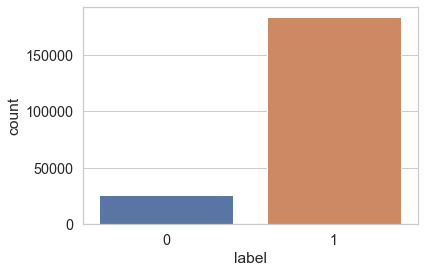

In [15]:
sns.countplot(df_new["label"])

<span style='background:yellow'>Observation: Fraud cases are represented in 0, and since its an imbalanced dataset, it is low  </span>

## Multivariate Analysis

In [16]:
corr_matrix = df.corr()
corr_matrix["label"].sort_values(ascending=True)

fr_da_rech90           -0.01
medianmarechprebal30   -0.00
aon                    -0.00
fr_da_rech30           -0.00
maxamnt_loans30         0.00
Unnamed: 0              0.00
fr_ma_rech30            0.00
last_rech_date_da       0.00
cnt_da_rech90           0.00
last_rech_date_ma       0.00
cnt_da_rech30           0.00
cnt_loans90             0.00
medianamnt_loans90      0.04
medianmarechprebal90    0.04
medianamnt_loans30      0.04
payback30               0.05
payback90               0.05
rental30                0.06
rental90                0.08
maxamnt_loans90         0.08
fr_ma_rech90            0.08
medianamnt_ma_rech90    0.12
last_rech_amt_ma        0.13
medianamnt_ma_rech30    0.14
daily_decr90            0.17
daily_decr30            0.17
cnt_loans30             0.20
amnt_loans30            0.20
amnt_loans90            0.20
sumamnt_ma_rech30       0.20
sumamnt_ma_rech90       0.21
cnt_ma_rech90           0.24
cnt_ma_rech30           0.24
label                   1.00
Name: label, d

<span style='background:yellow'>Observation: from this looks like the co-relation is very low between label and all variables. This is not a right way to check. Also since the columns are very high, did not use heatmap </span>

# Inter Quartile Range

## Outliers for each variable

<span style='background: pink'>Note:We already saw how each column was distributed. Now lets check outliers, since the dataset is huge and having 33 columns, lets split them and run and each for easier visiblity. We will be using box plots to find the IQR & the presence of each variable </span>

The IQR is calculated as the difference between the 75th and the 25th percentiles of the data and defines the box in a box and whisker plot.

We refer to the percentiles as quartiles (“quart” meaning 4) because the data is divided into four groups via the 25th, 50th and 75th values.

The IQR defines the middle 50% of the data, or the body of the data.

On a box and whisker plot, these limits are drawn as fences on the whiskers (or the lines) that are drawn from the box. Values that fall outside of these values are drawn as dots

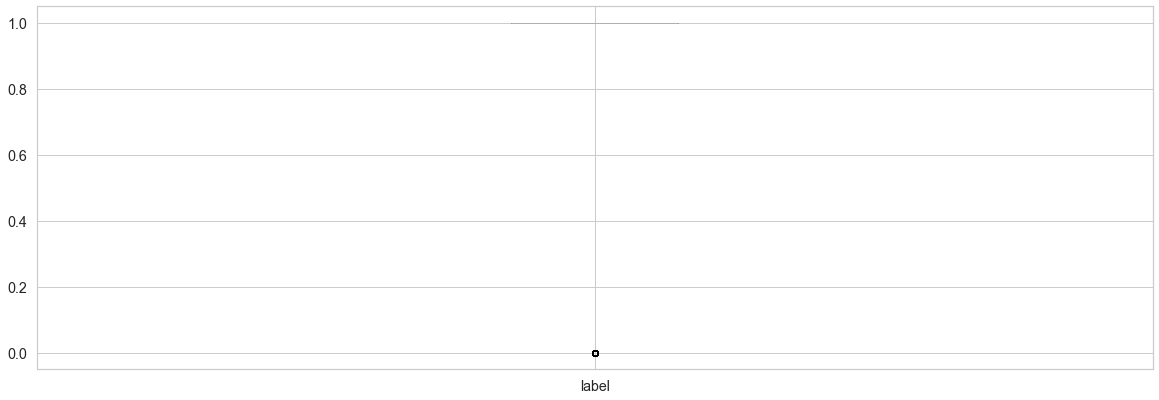

In [17]:
df_new.iloc[:,:1].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()
#this one is just for the target variable

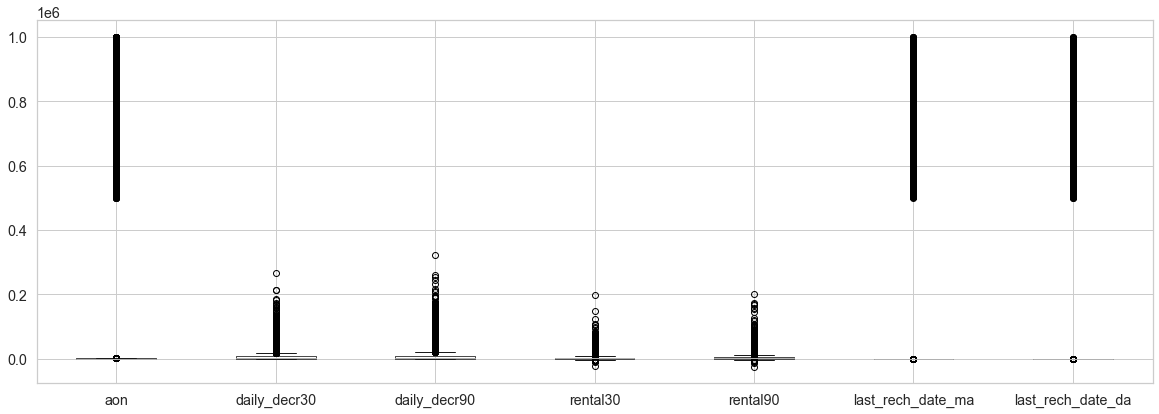

In [18]:
df_new.iloc[:,1:8].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

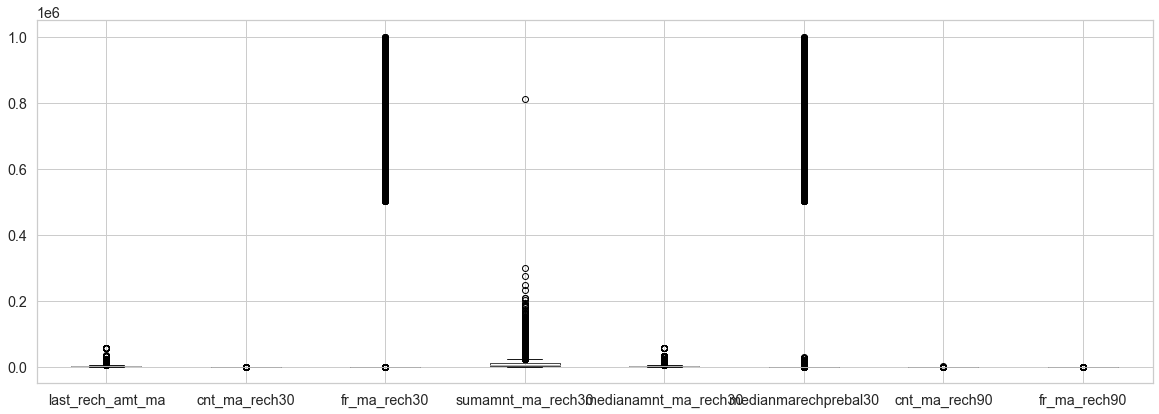

In [19]:
df_new.iloc[:,8:16].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

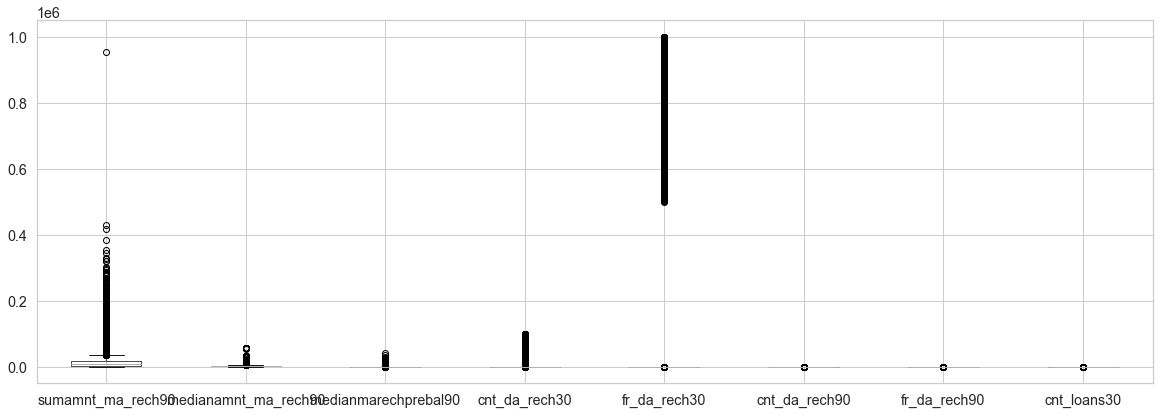

In [20]:
df_new.iloc[:,16:24].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

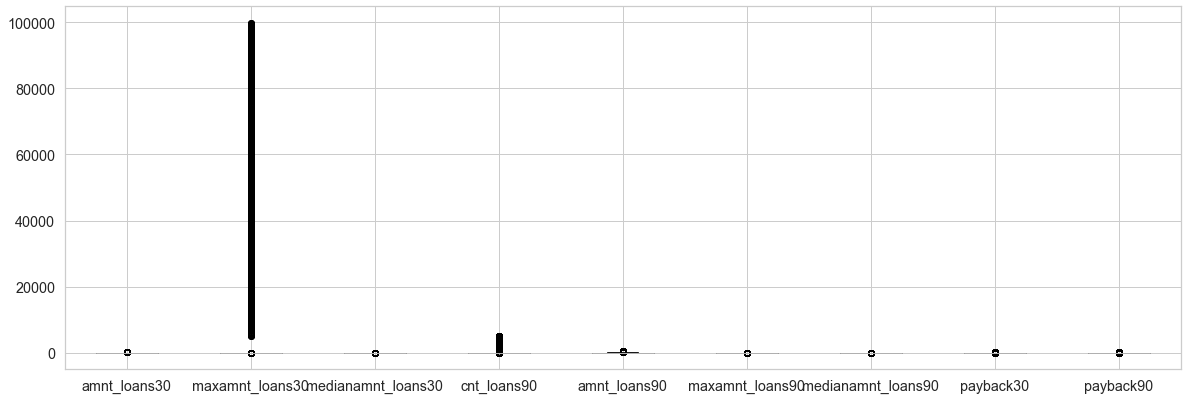

In [21]:
df_new.iloc[:,24:].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()


<span style='background:yellow'>Observation: On a box and whisker plot, IQR limits are drawn as fences on the whiskers (or the lines) that are drawn from the box. Values that fall outside of these values are drawn as dots  </span>

<span style='background:yellow'>Observation:The IQR can be used to identify outliers by defining limits on the sample values that are a factor k of the IQR below the 25th percentile or above the 75th percentile. The common value for the factor k is the value 1.5. A factor k of 3 or more can be used to identify values that are extreme outliers or “far outs” when described in the context of box and whisker plots.  </span>



## Handling Outliers- using IQR Methods- All columns

<span style='background: orange'>Update: We tried to remove the outliers, using several methods. Like applying for all columns, IQR*1.5, then IQR*3 . Also we tried to remove column by column. in all cases we saw huge data loss. so the code below is to just show what was done, but is not used furhter   </span>

In [22]:
Q1 = df_new.quantile(0.25)
Q3 = df_new.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

label                      0.00
aon                      736.00
daily_decr30            7201.56
daily_decr90            7760.10
rental30                3076.52
rental90                3901.53
last_rech_date_ma          6.00
last_rech_date_da          0.00
last_rech_amt_ma        1539.00
cnt_ma_rech30              4.00
fr_ma_rech30               6.00
sumamnt_ma_rech30       8470.00
medianamnt_ma_rech30    1154.00
medianmarechprebal30      72.00
cnt_ma_rech90              6.00
fr_ma_rech90               8.00
sumamnt_ma_rech90      13683.00
medianamnt_ma_rech90    1151.00
medianmarechprebal90      64.71
cnt_da_rech30              0.00
fr_da_rech30               0.00
cnt_da_rech90              0.00
fr_da_rech90               0.00
cnt_loans30                3.00
amnt_loans30              18.00
maxamnt_loans30            0.00
medianamnt_loans30         0.00
cnt_loans90                4.00
amnt_loans90              24.00
maxamnt_loans90            0.00
medianamnt_loans90         0.00
payback3

In [23]:
df_out1 = df_new[~((df_new < (Q1 - 1.5 * IQR)) |(df_new> (Q3 + 1.5 * IQR))).any(axis=1)]
df_out1.shape

(56628, 33)

In [24]:
df_new.shape

(209593, 33)

In [25]:
((209593-56628)/(209593))*100

72.98192210617721

<span style='background:orange'>Observation: If we do IQR*1.5, we will loose close to 72% of data. So we cant do this  </span>

In [26]:
df_out2 = df_new[~((df_new < (Q1 - 3 * IQR)) |(df_new> (Q3 + 3 * IQR))).any(axis=1)]
df_out2.shape

(86460, 33)

In [27]:
((209593-86460)/(209593))*100

58.748622329944226

<span style='background:orange'>Observation: If we do IQR*3, we will loose close to 58% of data. So we cant do this </span>

In [28]:
Q10 = df_new.quantile(0.10)
Q90 = df_new.quantile(0.90)
IQR1 = Q90 - Q10
print(IQR1)

label                      1.00
aon                     1279.00
daily_decr30           15582.01
daily_decr90           17776.83
rental30                7278.20
rental90                9457.85
last_rech_date_ma         15.00
last_rech_date_da          0.00
last_rech_amt_ma        4067.00
cnt_ma_rech30              9.00
fr_ma_rech30              12.00
sumamnt_ma_rech30      17892.00
medianamnt_ma_rech30    4048.00
medianmarechprebal30     237.39
cnt_ma_rech90             14.00
fr_ma_rech90              30.00
sumamnt_ma_rech90      29454.00
medianamnt_ma_rech90    3875.00
medianmarechprebal90     203.00
cnt_da_rech30              0.00
fr_da_rech30               0.00
cnt_da_rech90              0.00
fr_da_rech90               0.00
cnt_loans30                5.00
amnt_loans30              30.00
maxamnt_loans30            6.00
medianamnt_loans30         0.00
cnt_loans90                8.00
amnt_loans90              48.00
maxamnt_loans90            6.00
medianamnt_loans90         0.00
payback3

In [29]:
df_out3 = df_new[~((df_new < (Q10 -IQR1)) |(df_new> (Q90 + IQR1))).any(axis=1)]
df_out3.shape

(137256, 33)

In [30]:
((209593-137256)/(209593))*100

34.51308011240833

<span style='background:orange'>Observation: If we do IQR90-IQR10, we will loose close to 34% of data. So we cant do this </span>

## Handling Outliers- using IQR Methods-  One by one columns

In [31]:
df_out4=df_new

In [32]:
Q1 = df_out4["aon"].quantile(0.25)
Q3 = df_out4["aon"].quantile(0.75)
IQR=Q3-Q1
df_out4= df_out4[(df["aon"] > (Q1 - 1.5 * IQR)) & (df_out4["aon"]< (Q3 + 1.5 * IQR))]

In [33]:
df_out4.shape

(205970, 33)

In [34]:
Q1 = df_out4["daily_decr30"].quantile(0.25)
Q3 = df_out4["daily_decr30"].quantile(0.75)
IQR=Q3-Q1
df_out4= df_out4[(df["daily_decr30"] > (Q1 - 1.5 * IQR)) & (df_out4["daily_decr30"]< (Q3 + 1.5 * IQR))]

In [35]:
df_out4.shape

(189872, 33)

In [36]:
Q1 = df_out4["daily_decr90"].quantile(0.25)
Q3 = df_out4["daily_decr90"].quantile(0.75)
IQR=Q3-Q1
df_out4= df_out4[(df["daily_decr90"] > (Q1 - 1.5 * IQR)) & (df_out4["daily_decr90"]< (Q3 + 1.5 * IQR))]

In [37]:
df_out4.shape

(177655, 33)

In [38]:
Q1 = df_out4["rental30"].quantile(0.25)
Q3 = df_out4["rental30"].quantile(0.75)
IQR=Q3-Q1
df_out4= df_out4[(df["rental30"] > (Q1 - 1.5 * IQR)) & (df_out4["rental30"]< (Q3 + 1.5 * IQR))]

In [39]:
df_out4.shape

(160269, 33)

In [40]:
((209593-160269)/(209593))*100

23.53322868607253

<span style='background:orange'>Observation: If we column by column as well, we lost 23% of data.So we cant do this as well </span>

## Replacing Outliers with Median Values

After multiple approaches failed with outliers, did some more reading on the net. And there was a suggestion to 
replace the outliers with median values

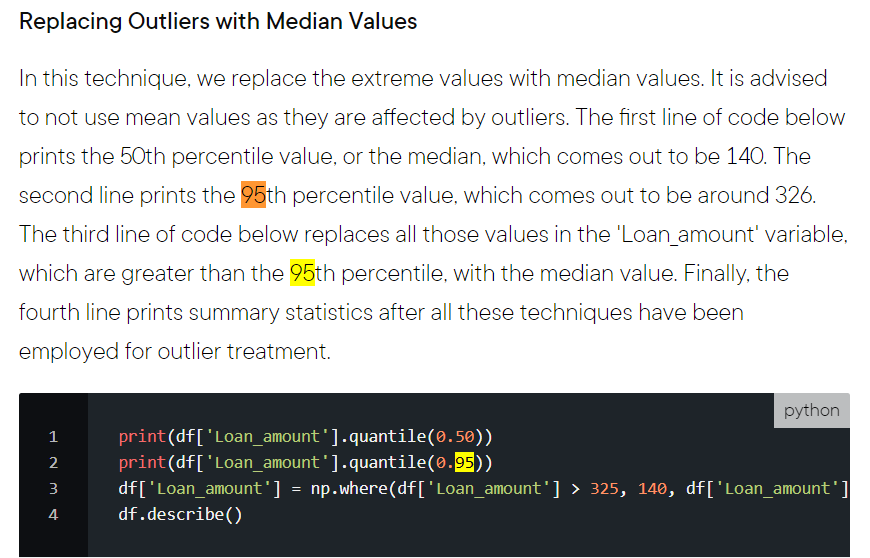

Reference Link: https://www.pluralsight.com/guides/cleaning-up-data-from-outliers

In [41]:
df_new.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00
mean,0.88,8112.34,5381.40,6082.52,2692.58,3483.41,3755.85,3712.20,2064.45,3.98,3737.36,7704.50,1812.82,3851.93,6.32,7.72,12396.22,1864.60,92.03,262.58,3749.49,0.04,0.05,2.76,17.95,274.66,0.05,18.52,23.65,6.70,0.05,3.40,4.32
std,0.33,75696.08,9220.62,10918.81,4308.59,5770.46,53905.89,53374.83,2370.79,4.26,53643.63,10139.62,2070.86,54006.37,7.19,12.59,16857.79,2081.68,369.22,4183.90,53885.41,0.40,0.95,2.55,17.38,4245.26,0.22,224.80,26.47,2.10,0.20,8.81,10.31
min,0.00,-48.00,-93.01,-93.01,-23737.14,-24720.58,-29.00,-29.00,0.00,0.00,0.00,0.00,0.00,-200.00,0.00,0.00,0.00,0.00,-200.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,246.00,42.44,42.69,280.42,300.26,1.00,0.00,770.00,1.00,0.00,1540.00,770.00,11.00,2.00,0.00,2317.00,773.00,14.60,0.00,0.00,0.00,0.00,1.00,6.00,6.00,0.00,1.00,6.00,6.00,0.00,0.00,0.00
50%,1.00,527.00,1469.18,1500.00,1083.57,1334.00,3.00,0.00,1539.00,3.00,2.00,4628.00,1539.00,33.90,4.00,2.00,7226.00,1539.00,36.00,0.00,0.00,0.00,0.00,2.00,12.00,6.00,0.00,2.00,12.00,6.00,0.00,0.00,1.67
75%,1.00,982.00,7244.00,7802.79,3356.94,4201.79,7.00,0.00,2309.00,5.00,6.00,10010.00,1924.00,83.00,8.00,8.00,16000.00,1924.00,79.31,0.00,0.00,0.00,0.00,4.00,24.00,6.00,0.00,5.00,30.00,6.00,0.00,3.75,4.50
max,1.00,999860.76,265926.00,320630.00,198926.11,200148.11,998650.38,999171.81,55000.00,203.00,999606.37,810096.00,55000.00,999479.42,336.00,88.00,953036.00,55000.00,41456.50,99914.44,999809.24,38.00,64.00,50.00,306.00,99864.56,3.00,4997.52,438.00,12.00,3.00,171.50,171.50


<span style='background:yellow'>Observation: we can see our target column"label" is normally distributed. So we will leave this column and for all other columns we will replace the outliers with median as needed  </span>

In [42]:
df_new1=df_new

In [43]:
x=df_new1.iloc[:,1:]
x.columns

Index(['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90'],
      dtype='object')

In [44]:
for i in x:
    print("feature \t", i)
    print("=======================")
    Q50 = df_new[i].quantile(0.50)
    Q95 = df_new[i].quantile(0.95)
    print(Q50, Q95)
    df_new1[i] = np.where(df_new1[i] > Q95, Q50, df_new1[i])
    print(df_new1[i].describe())
df_new1.describe()
   

feature 	 aon
527.0 1749.0
count   209593.00
mean       596.89
std        419.73
min        -48.00
25%        246.00
50%        527.00
75%        869.00
max       1749.00
Name: aon, dtype: float64
feature 	 daily_decr30
1469.17566666667 22577.499999999985
count   209593.00
mean      3696.46
std       5165.89
min        -93.01
25%         42.44
50%       1469.18
75%       5616.07
max      22576.50
Name: daily_decr30, dtype: float64
feature 	 daily_decr90
1500.0 26244.257999999994
count   209593.00
mean      4069.46
std       5872.16
min        -93.01
25%         42.69
50%       1500.00
75%       5965.36
max      26243.89
Name: daily_decr90, dtype: float64
feature 	 rental30
1083.57 11166.419999999998
count   209593.00
mean      1906.89
std       2360.25
min     -23737.14
25%        280.42
50%       1083.57
75%       2634.25
max      11166.26
Name: rental30, dtype: float64
feature 	 rental90
1334.0 14642.973999999995
count   209593.00
mean      2419.01
std       3066.78
min     -24720.58

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00
mean,0.88,596.89,3696.46,4069.46,1906.89,2419.01,4.28,-0.00,1865.78,3.35,3.07,5970.96,1476.36,56.28,5.17,5.46,9455.12,1518.41,52.97,0.00,0.00,0.00,0.00,2.40,14.92,6.65,0.02,3.05,18.82,6.70,0.01,1.89,2.51
std,0.33,419.73,5165.89,5872.16,2360.25,3066.78,5.32,0.14,1863.60,2.84,3.89,5575.72,1266.20,77.27,4.59,8.47,9187.95,1255.34,66.32,0.00,0.00,0.00,0.00,1.74,10.71,2.15,0.09,2.58,15.76,2.10,0.08,2.77,3.39
min,0.00,-48.00,-93.01,-93.01,-23737.14,-24720.58,-29.00,-29.00,0.00,0.00,0.00,0.00,0.00,-200.00,0.00,0.00,0.00,0.00,-200.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,246.00,42.44,42.69,280.42,300.26,1.00,0.00,770.00,1.00,0.00,1540.00,770.00,11.00,2.00,0.00,2317.00,773.00,14.60,0.00,0.00,0.00,0.00,1.00,6.00,6.00,0.00,1.00,6.00,6.00,0.00,0.00,0.00
50%,1.00,527.00,1469.18,1500.00,1083.57,1334.00,3.00,0.00,1539.00,3.00,2.00,4628.00,1539.00,33.90,4.00,2.00,7226.00,1539.00,36.00,0.00,0.00,0.00,0.00,2.00,12.00,6.00,0.00,2.00,12.00,6.00,0.00,0.00,1.67
75%,1.00,869.00,5616.07,5965.36,2634.25,3354.91,6.00,0.00,1924.00,5.00,5.00,8499.00,1543.00,69.50,7.00,7.00,13565.00,1547.00,67.60,0.00,0.00,0.00,0.00,3.00,18.00,6.00,0.00,4.00,24.00,6.00,0.00,3.11,3.75
max,1.00,1749.00,22576.50,26243.89,11166.26,14642.49,25.00,0.00,8000.00,12.00,16.00,24837.00,7526.00,402.40,20.00,37.00,41779.00,7526.00,345.77,0.00,0.00,0.00,0.00,8.00,48.00,12.00,0.50,12.00,72.00,12.00,0.50,13.00,17.00


<span style='background:yellow'>Observation: By observing the diff between both the describe, we can see there is a good change. The outliers have been replaced </span>

In [45]:
df_new1.skew()

label                    -2.27
aon                       0.76
daily_decr30              1.62
daily_decr90              1.73
rental30                  1.71
rental90                  1.78
last_rech_date_ma         0.55
last_rech_date_da      -170.23
last_rech_amt_ma          2.06
cnt_ma_rech30             1.01
fr_ma_rech30              1.44
sumamnt_ma_rech30         1.20
medianamnt_ma_rech30      1.99
medianmarechprebal30      1.98
cnt_ma_rech90             1.16
fr_ma_rech90              2.16
sumamnt_ma_rech90         1.32
medianamnt_ma_rech90      2.09
medianmarechprebal90      1.72
cnt_da_rech30             0.00
fr_da_rech30              0.00
cnt_da_rech90             0.00
fr_da_rech90              0.00
cnt_loans30               1.31
amnt_loans30              1.26
maxamnt_loans30           1.44
medianamnt_loans30        5.39
cnt_loans90               1.50
amnt_loans90              1.46
maxamnt_loans90           1.68
medianamnt_loans90        5.83
payback30                 1.65
payback9

<span style='background:yellow'>Observation: We can see the skewness is also reduced. Though it is present in few columns. Lets use pCA next </span>

# PCA

In [46]:
#PCA accepts scale data, so we are using Standardscalar. The output is changed in new dataset scaledX
#we are only using the features. The target column is removed while doing PCA, as we didnt want to changes it values

In [47]:
x.describe()

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00,209593.00
mean,8112.34,5381.40,6082.52,2692.58,3483.41,3755.85,3712.20,2064.45,3.98,3737.36,7704.50,1812.82,3851.93,6.32,7.72,12396.22,1864.60,92.03,262.58,3749.49,0.04,0.05,2.76,17.95,274.66,0.05,18.52,23.65,6.70,0.05,3.40,4.32
std,75696.08,9220.62,10918.81,4308.59,5770.46,53905.89,53374.83,2370.79,4.26,53643.63,10139.62,2070.86,54006.37,7.19,12.59,16857.79,2081.68,369.22,4183.90,53885.41,0.40,0.95,2.55,17.38,4245.26,0.22,224.80,26.47,2.10,0.20,8.81,10.31
min,-48.00,-93.01,-93.01,-23737.14,-24720.58,-29.00,-29.00,0.00,0.00,0.00,0.00,0.00,-200.00,0.00,0.00,0.00,0.00,-200.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,246.00,42.44,42.69,280.42,300.26,1.00,0.00,770.00,1.00,0.00,1540.00,770.00,11.00,2.00,0.00,2317.00,773.00,14.60,0.00,0.00,0.00,0.00,1.00,6.00,6.00,0.00,1.00,6.00,6.00,0.00,0.00,0.00
50%,527.00,1469.18,1500.00,1083.57,1334.00,3.00,0.00,1539.00,3.00,2.00,4628.00,1539.00,33.90,4.00,2.00,7226.00,1539.00,36.00,0.00,0.00,0.00,0.00,2.00,12.00,6.00,0.00,2.00,12.00,6.00,0.00,0.00,1.67
75%,982.00,7244.00,7802.79,3356.94,4201.79,7.00,0.00,2309.00,5.00,6.00,10010.00,1924.00,83.00,8.00,8.00,16000.00,1924.00,79.31,0.00,0.00,0.00,0.00,4.00,24.00,6.00,0.00,5.00,30.00,6.00,0.00,3.75,4.50
max,999860.76,265926.00,320630.00,198926.11,200148.11,998650.38,999171.81,55000.00,203.00,999606.37,810096.00,55000.00,999479.42,336.00,88.00,953036.00,55000.00,41456.50,99914.44,999809.24,38.00,64.00,50.00,306.00,99864.56,3.00,4997.52,438.00,12.00,3.00,171.50,171.50


In [48]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaledX=scaler.fit_transform(x)


In [49]:
scaledX

array([[-0.10357685, -0.25229941, -0.27634619, ..., -0.22959366,
         2.9046997 ,  2.39409346],
       [-0.09776412,  0.73103667,  0.5533797 , ..., -0.22959366,
        -0.38562959, -0.41923266],
       [-0.10010243, -0.43201111, -0.42903256, ..., -0.22959366,
        -0.38562959, -0.41923266],
       ...,
       [-0.09378769,  0.70079045,  0.53319431, ..., -0.22959366,
         0.06820893, -0.04735622],
       [-0.08428915,  0.77075515,  0.59455827, ..., -0.22959366,
        -0.38562959,  0.59938541],
       [-0.08628398, -0.09674426, -0.14174607, ..., -0.22959366,
        -0.38562959, -0.41923266]])

apply PCA on the scaledX, on the instance Testpca & saving on new variable y
we are not giving the number of columns needed etc

In [50]:
from sklearn.decomposition import PCA

testpca=PCA()
Y=testpca.fit(scaledX)

we are running a np.cumsum
Cumsum is cummulative Sum till any given point

In [51]:
Y.explained_variance_ratio_

array([0.21459127, 0.09991415, 0.0610483 , 0.05904924, 0.05199165,
       0.04178136, 0.03165887, 0.03149755, 0.03136331, 0.03133143,
       0.03129033, 0.03121988, 0.03111043, 0.03105006, 0.03102034,
       0.03091583, 0.03074644, 0.02773183, 0.02578528, 0.02032113,
       0.01617778, 0.00927242, 0.00646062, 0.00563217, 0.00518462,
       0.0041648 , 0.00271251, 0.00183885, 0.00129428, 0.00074334,
       0.00063827, 0.00046163])

In [52]:
var_cumu=np.cumsum(Y.explained_variance_ratio_)*100
var_cumu

array([ 21.45912746,  31.45054255,  37.55537241,  43.46029629,
        48.65946124,  52.83759718,  56.00348461,  59.15323992,
        62.28957123,  65.42271417,  68.55174755,  71.67373594,
        74.78477845,  77.88978461,  80.99181897,  84.08340226,
        87.15804623,  89.9312297 ,  92.50975742,  94.54187019,
        96.15964863,  97.08689107,  97.73295277,  98.29616937,
        98.81463124,  99.23111169,  99.50236272,  99.68624807,
        99.81567563,  99.89000989,  99.95383739, 100.        ])

calculate the cumulative sum as it is more readable than the explained variance ratio and save it var_cumu
Output interpretation
1 variable, then only 25% infromation is there
2 variable then only 31% information is there


Any threshold you can take recommended not to go below 85%, so generally 95% is taken

Manually counting the columns wont be helpful, so below is a workaround
1st line: till which number of columns, my number is greater than 95 (any threshold value you can do )
    K is the number of column
    

In [53]:
#How many PCs explains 95% of the variance ?

k= np.argmax(var_cumu>95)
print("Number of components explaining 95% of variance: ", k)

Number of components explaining 95% of variance:  20


In [54]:
#How many PCs explains 99% of the variance ?

k= np.argmax(var_cumu>99)
print("Number of components explaining 99% of variance: ", k)

Number of components explaining 99% of variance:  25


<span style='background:yellow'>Observation: With 18 columns we can retain 95% of data, with 24columns, we can do 99% of data. Since this is already and imbalanced dataset, lets go with the max  </span>

## Plotting the PCA

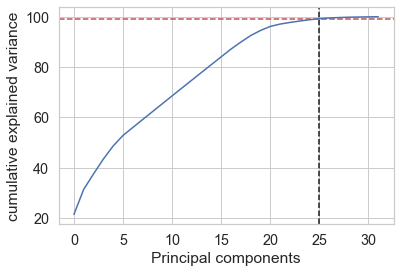

In [55]:
plt.ylabel("cumulative explained variance")
plt.xlabel("Principal components")
plt.axvline(x=k, color="k", linestyle ="--")
plt.axhline(y=99, color='r', linestyle="--")
plt.plot(var_cumu)
plt.show()

## Creating Final datset with 24 columns

In [56]:
FinalPCA=PCA(n_components=24)
FinalData=FinalPCA.fit_transform(scaledX)

In [57]:
FinalData

array([[-1.4240632 , -0.19471983,  2.55626472, ...,  0.07367632,
         0.00948702,  0.06726607],
       [ 0.46024122,  3.19638525, -0.26004413, ..., -0.46373919,
        -0.19105587, -0.78887995],
       [-1.97331556,  0.10913358, -0.52952791, ...,  0.03192193,
        -0.05867353, -0.08704728],
       ...,
       [ 2.43446309, -0.78029201,  0.56253557, ...,  0.05209889,
        -0.12784164,  0.1684459 ],
       [ 0.84139522, -0.05418891,  0.23340498, ...,  0.16850144,
        -0.10573387, -0.33914587],
       [ 0.54364963,  3.57268204, -1.09154858, ..., -0.61206736,
         0.32377115,  0.13548701]])

In [58]:
FinalData2=pd.DataFrame(FinalData)

In [59]:
FinalData2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,-1.42,-0.19,2.56,-1.54,-2.49,-0.06,0.13,0.02,-0.07,-0.11,-0.25,-0.07,-0.01,-0.05,-0.05,-0.08,-0.27,0.45,0.51,-0.07,-0.12,0.07,0.01,0.07
1,0.46,3.20,-0.26,-0.43,0.63,-0.18,0.41,-0.18,0.01,-0.23,-0.89,-0.67,0.08,-0.33,-0.07,-0.84,-0.22,0.55,-2.24,-0.14,0.00,-0.46,-0.19,-0.79
2,-1.97,0.11,-0.53,-0.21,0.48,-0.11,0.15,0.00,-0.08,-0.03,-0.38,-0.21,-0.04,0.00,0.10,-0.29,0.30,-0.32,-0.13,-0.03,-0.19,0.03,-0.06,-0.09
3,-2.12,-0.75,-0.58,-0.10,0.39,-0.06,0.16,-0.01,-0.06,-0.06,-0.39,-0.21,-0.03,-0.04,0.06,-0.28,0.14,-0.20,-0.27,-0.03,-0.43,0.21,0.17,0.24
4,1.53,-0.70,-1.40,-0.06,-1.33,0.30,-0.14,0.19,-0.12,0.10,0.16,0.40,-0.16,0.19,0.05,0.50,-0.04,-0.81,-0.67,-0.03,0.12,0.94,-0.03,0.18


In [60]:
FinalData2.shape

(209593, 24)

In [61]:
df_new.shape

(209593, 33)

In [62]:
32-24

8

<span style='background:yellow'>Observation: We have removed 8 columns but still retained 99% of data using PCA  </span>

# Over Sampling

<span style='background:ping'>Note: Since our data is imbalanced, we need to do oversamplng. So that the target variables are split same way while modeling, and the models are more effective.  </span>

<span style='background:Pink'>Note: Reason for not choosing undersampling: oversampling is better, because you keep all the information in the training dataset. With undersampling you drop a lot of information. Even if this dropped information belongs to the majority class, it is usefull information for a modeling algorithm  </span>

In [63]:
y=df_new["label"]
x=FinalData2

In [64]:
y.value_counts()

1    183431
0     26162
Name: label, dtype: int64

<span style='background:yellow'>Observation: Confirms that our data is imbalanced </span>

In [65]:
from imblearn.over_sampling import RandomOverSampler

In [66]:
random_over_sampler = RandomOverSampler()

In [67]:
x_res,y_res=random_over_sampler.fit_resample(x,y)

In [68]:
y_res.value_counts()

1    183431
0    183431
Name: label, dtype: int64

<span style='background:yellow'>Observation: Now our target variable is balanced. Lets move to Model building  </span>

# Model Building

## Importing Packages for Model Building

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

## Splitting into Train & Test Data

In [70]:
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=.20,random_state=43)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(293489, 24)
(73373, 24)
(293489,)
(73373,)


## Instantiating the models

In [71]:
# Since this is a Classification dataset, lets use the following Algos and instantiate them
lg=LogisticRegression()
gnb=GaussianNB()
sv=SVC()
rf=RandomForestClassifier(n_estimators=100)
ad=AdaBoostClassifier(n_estimators=100)
dtc=DecisionTreeClassifier()

## Building the models 

In [72]:
#above using all the models in one for loop took a lot of time. So we are going to build one by one now

In [73]:
%time

model=[lg]

for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print("\n f1 score: of ",m)
    print(f1_score(y_test,pred))
    print("\n  Classificatin report:  of ",m)
    print(classification_report(y_test,pred))
    print("***************************************")

Wall time: 0 ns

 f1 score: of  LogisticRegression()
0.7364063807078778

  Classificatin report:  of  LogisticRegression()
              precision    recall  f1-score   support

           0       0.73      0.80      0.76     36752
           1       0.78      0.70      0.74     36621

    accuracy                           0.75     73373
   macro avg       0.75      0.75      0.75     73373
weighted avg       0.75      0.75      0.75     73373

***************************************


<span style='background:yellow'>Observation: The F1-score for 0 & 1 is around 75%. The catch over here is we got for both 0 & 1, in a balanced dataset lets see if it improves in other models  </span>

In [74]:
%time

model=[rf]

for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print("\n f1 score: of ",m)
    print(f1_score(y_test,pred))
    print("\n  Classificatin report:  of ",m)
    print(classification_report(y_test,pred))
    print("***************************************")

Wall time: 0 ns

 f1 score: of  RandomForestClassifier()
0.9735700086793403

  Classificatin report:  of  RandomForestClassifier()
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     36752
           1       1.00      0.95      0.97     36621

    accuracy                           0.97     73373
   macro avg       0.98      0.97      0.97     73373
weighted avg       0.98      0.97      0.97     73373

***************************************


<span style='background:yellow'>Observation: Random Forest Classifier has given an great score of 97% for F1 and precision & recall also has good score. So we can see if any of the following models come close to RFC </span>

In [75]:
%time

model=[dtc]

for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print("\n f1 score: of ",m)
    print(f1_score(y_test,pred))
    print("\n  Classificatin report:  of ",m)
    print(classification_report(y_test,pred))
    print("***************************************")

Wall time: 0 ns

 f1 score: of  DecisionTreeClassifier()
0.9481880888531972

  Classificatin report:  of  DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     36752
           1       1.00      0.90      0.95     36621

    accuracy                           0.95     73373
   macro avg       0.95      0.95      0.95     73373
weighted avg       0.95      0.95      0.95     73373

***************************************


<span style='background:yellow'>Observation: DTC is also good at 95%, still RFC is better. With the data being huge, RFC is better to use as well </span>

In [76]:
%time

model=[ad]

for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print("\n f1 score: of ",m)
    print(f1_score(y_test,pred))
    print("\n  Classificatin report:  of ",m)
    print(classification_report(y_test,pred))
    print("***************************************")

Wall time: 0 ns

 f1 score: of  AdaBoostClassifier(n_estimators=100)
0.7580124638326284

  Classificatin report:  of  AdaBoostClassifier(n_estimators=100)
              precision    recall  f1-score   support

           0       0.75      0.78      0.77     36752
           1       0.77      0.74      0.76     36621

    accuracy                           0.76     73373
   macro avg       0.76      0.76      0.76     73373
weighted avg       0.76      0.76      0.76     73373

***************************************


<span style='background:yellow'>Observation:Less compared to RFC, is AdaBoost Classifier so we can drop it from further analysis </span>

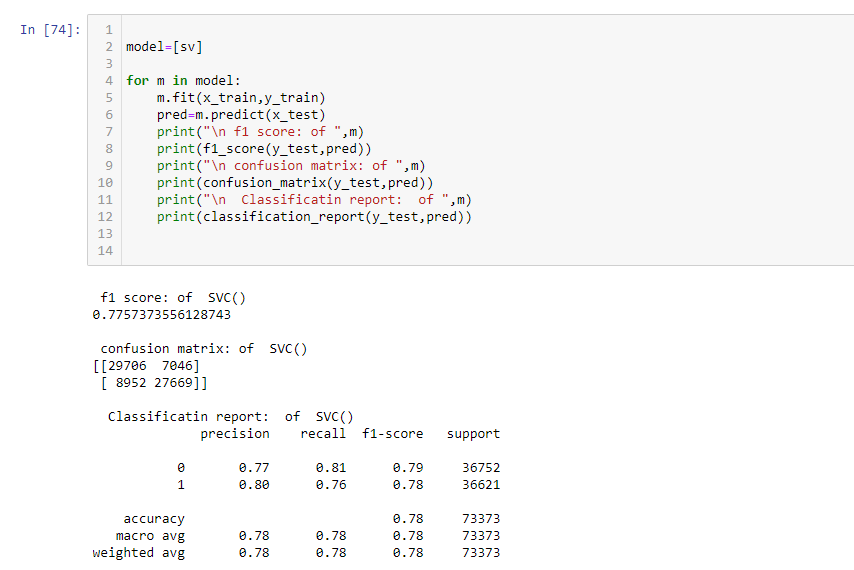

<span style='background:yellow'>Observation: Less compared to RFC, is Supprt Vector so we can drop it from further analysis  </span>

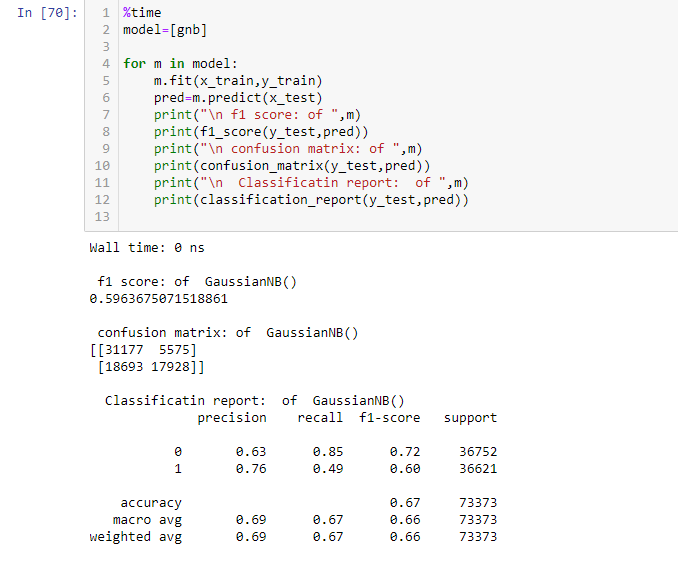


<span style='background:yellow'>Observation: Less compared to RFC, is GNB so we can drop it from further analysis  </span>

## Comparing the Best Models with the Cross Validation

In [79]:
%time

modelList=[("Dec Tree Classifier", dtc)]

def GetAccuracy(x,y,modelList):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=43)
    ModelName= []
    modelf1=[]
    modelCrossval=[]
    f1CVDiff=[]
    for Nameofmodel, modelInstance in modelList:
        ModelName.append(Nameofmodel)
        modelInstance.fit(x_train,y_train)
        pred=modelInstance.predict(x_test)
        f1score= f1_score(y_test,pred)
        modelf1.append(f1score)
        crossval=cross_val_score(modelInstance,x,y,scoring="f1",cv=5).mean()
        modelCrossval.append(crossval)
        f1CVDiff.append(f1score-crossval)
    df_acc=pd.DataFrame({"Name":ModelName,
                         "f1": modelf1,
                         "CrossValidation":modelCrossval,
                          "Difference in Accuracy": f1CVDiff})
    return df_acc
GetAccuracy(x,y,modelList)

Wall time: 0 ns


,Name,f1,CrossValidation,Difference in Accuracy
0,Dec Tree Classifier,0.91,0.91,0.00


In [78]:
%time

modelList=[("Random Forest Class",rf)]

def GetAccuracy(x,y,modelList):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=43)
    ModelName= []
    modelf1=[]
    modelCrossval=[]
    f1CVDiff=[]
    for Nameofmodel, modelInstance in modelList:
        ModelName.append(Nameofmodel)
        modelInstance.fit(x_train,y_train)
        pred=modelInstance.predict(x_test)
        f1score= f1_score(y_test,pred)
        modelf1.append(f1score)
        crossval=cross_val_score(modelInstance,x,y,scoring="f1",cv=5).mean()
        modelCrossval.append(crossval)
        f1CVDiff.append(f1score-crossval)
    df_acc=pd.DataFrame({"Name":ModelName,
                         "f1": modelf1,
                         "CrossValidation":modelCrossval,
                          "Difference in Accuracy": f1CVDiff})
    return df_acc
GetAccuracy(x,y,modelList)

Wall time: 0 ns


,Name,f1,CrossValidation,Difference in Accuracy
0,Random Forest Class,0.94,0.94,-0.00


<span style='background:yellow'>Observation: For both DTC & RFC we got the diff between F1 & CV as 0. So we can choose either one. RFC has better F1-score, so we are choosing that </span>

# Hyper Parameter Tuning

#since the dataset is huge, using Grid search CV will take time. So lets use Random Search CV
from sklearn.model_selection import RandomizedSearchCV

In [83]:
from sklearn.model_selection import RandomizedSearchCV
# parameters for RandomSearchCV
parameters = {"max_depth": range(2,6),
              "min_samples_split": range(6, 11),
              "min_samples_leaf": range(1, 5),
              "bootstrap": [True,False],
              "n_estimators": [100, 400],
              "criterion" : ["gini", "entropy"],              
             }
# run randomized search


In [84]:
RCV=RandomizedSearchCV(RandomForestClassifier(),parameters,cv=5)

In [ ]:
RCV.fit(x_train,y_train)

In [ ]:
RCV.best_params_

In [ ]:
mod=RandomForestClassifer(criterion='gini',max_depth=7,random_state=43)

mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(f1_score(y_test,pred)*100)


# Saving the model

In [ ]:
import joblib
joblib.dump(mod,"MicroCredit.pkl")

# Loading the Saved Model

In [ ]:
model=joblib.load("MicroCredit.pkl")

In [ ]:
prediction=model.predict(x_test)

In [ ]:
print(f1_score(y_test,pred)*100)

In [ ]:
prediction=pd.DataFrame(prediction) #converting to a Data Frame

In [ ]:
prediction.head()  #checking the top 5 values, to double check fi there are predictions

In [ ]:
prediction.to_csv('MicrocreditResults.csv') #saving the prediction

# Conclusion